# Genres Dataset

In this notebook, I will be using the **data_by_genres_o.csv** dataset.
I will use different clustering algorithms and evaluate the result with a fair range of evaluation metrics.

In [10]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [30]:
df_genres = pd.read_csv("data_by_genres_o.csv")

In [12]:
df_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [13]:
nRows, nCols = df_genres.shape
print(f'This dataset has {nRows} rows and {nCols} columns.')

This dataset has 2973 rows and 14 columns.


In [14]:
print(df_genres.duplicated().any())

False


In [15]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [16]:
df_genres.nunique()

mode                   2
genres              2973
acousticness        2802
danceability        2725
duration_ms         2872
energy              2781
instrumentalness    2733
liveness            2715
loudness            2872
speechiness         2720
tempo               2872
valence             2746
popularity          2186
key                   12
dtype: int64

Only the attributes tempo, key, popularity, duration_ms are not in the range between 0 and 1.
I might scale the dataset later.

In [17]:
df_genres.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


## EDA

A pairplot to check the distributions of the variables


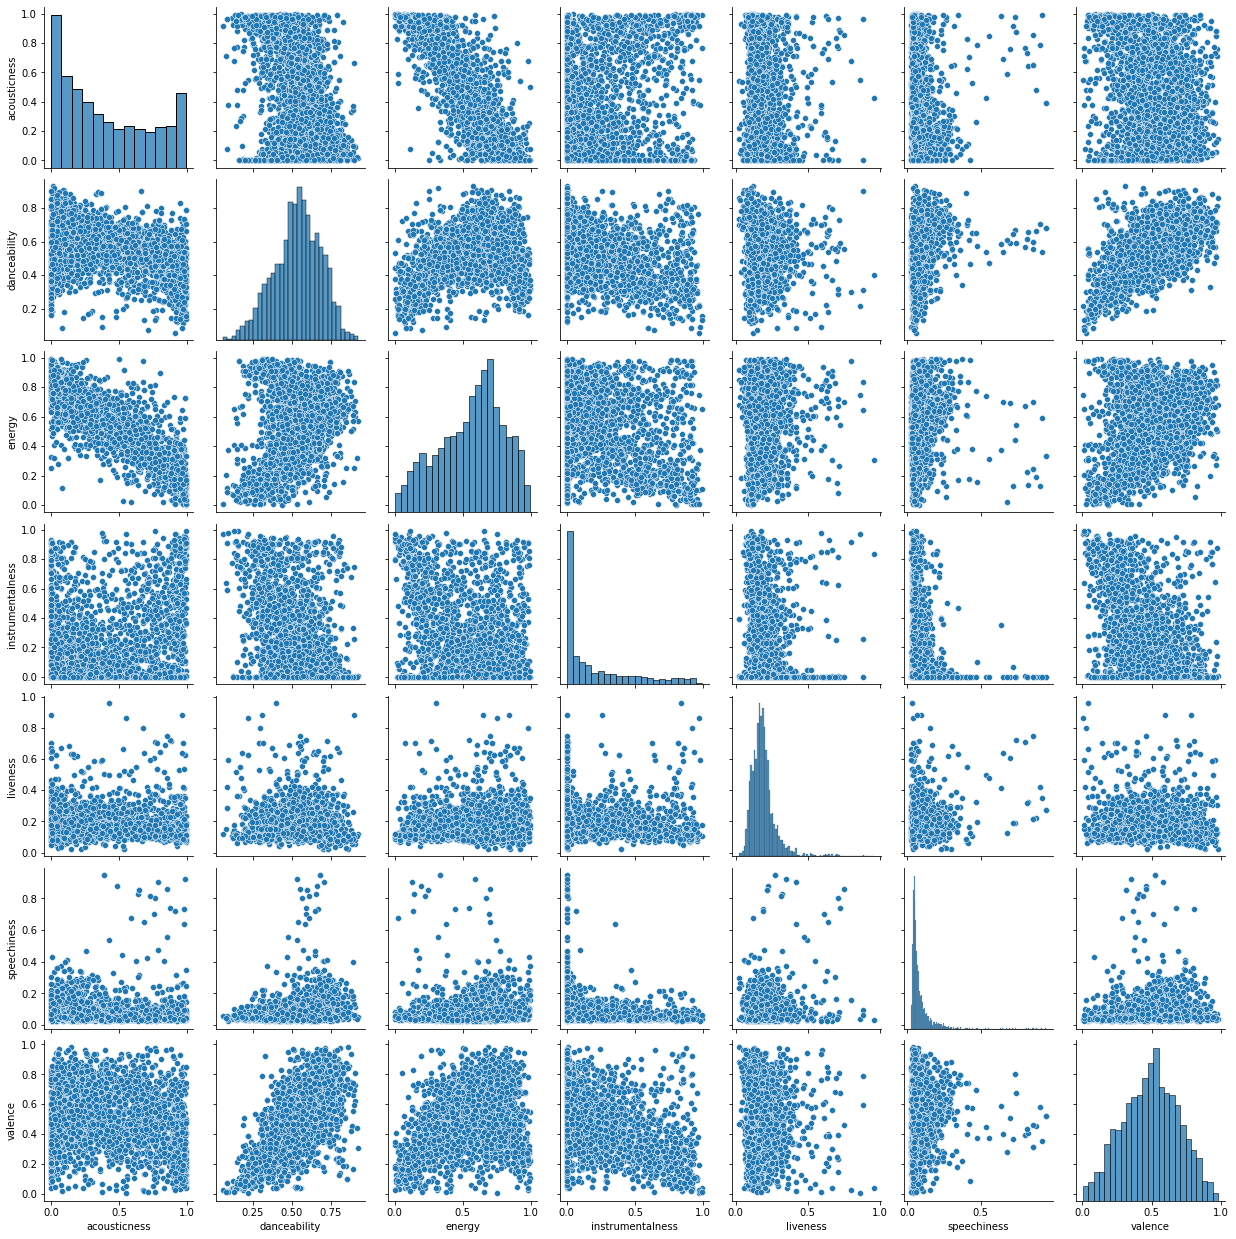

In [18]:
sns.pairplot(data=df_genres[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']])
print('A pairplot to check the distributions of the variables')
plt.show()

Enery and loudness are inversly correlated to acousticness.

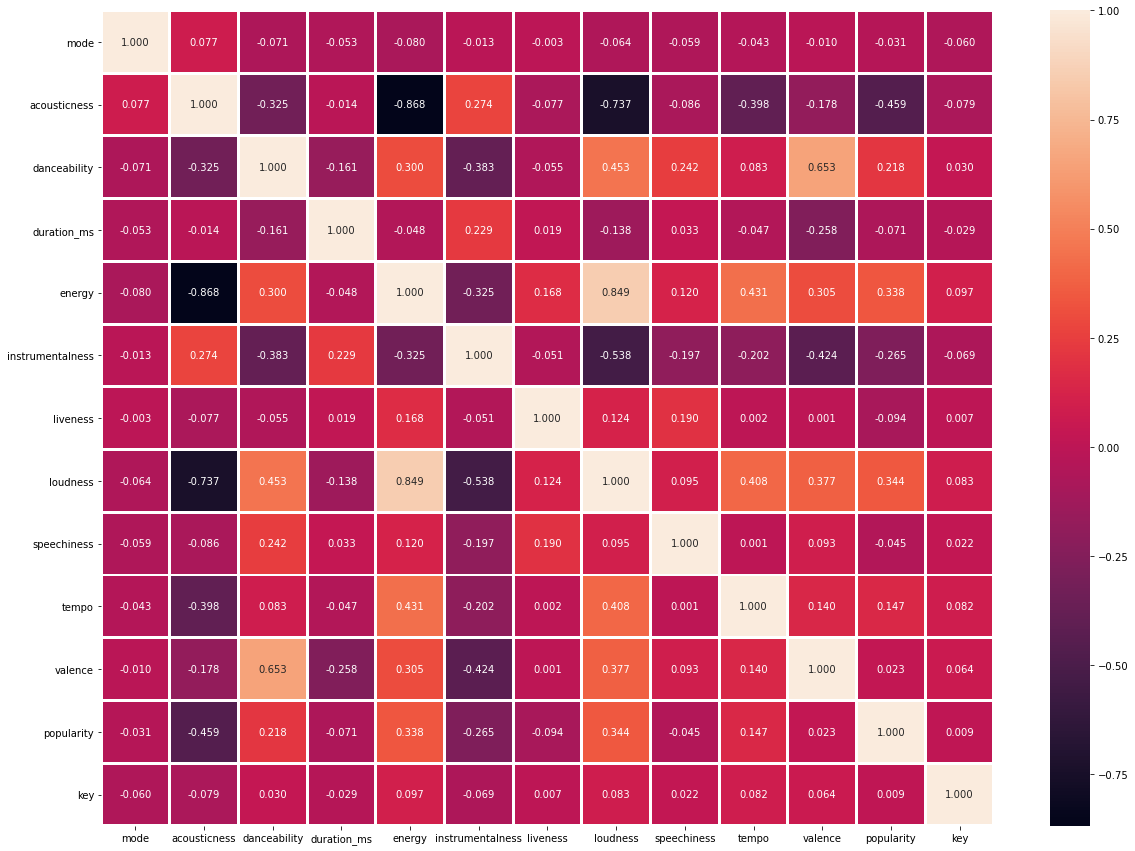

In [19]:
%matplotlib inline

plt.figure(figsize=(20,15))
sns.heatmap(df_genres.corr(), annot=True, fmt='.3f', linewidths=2)
plt.show()

Getting the most popular genres

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'basshall'),
  Text(1, 0, 'turkish edm'),
  Text(2, 0, 'south african house'),
  Text(3, 0, 'trap venezolano'),
  Text(4, 0, 'chinese electropop'),
  Text(5, 0, 'alberta hip hop'),
  Text(6, 0, 'afroswing'),
  Text(7, 0, 'uk diy punk'),
  Text(8, 0, 'guaracha'),
  Text(9, 0, 'russian dance'),
  Text(10, 0, 'circuit'),
  Text(11, 0, 'afro soul'),
  Text(12, 0, 'indie triste'),
  Text(13, 0, 'pagode baiano'),
  Text(14, 0, 'ritmo kombina'),
  Text(15, 0, 'trap triste'),
  Text(16, 0, 'norwegian pop rap'),
  Text(17, 0, 'urbano espanol'),
  Text(18, 0, 'musica canaria'),
  Text(19, 0, 'argentine hip hop')])

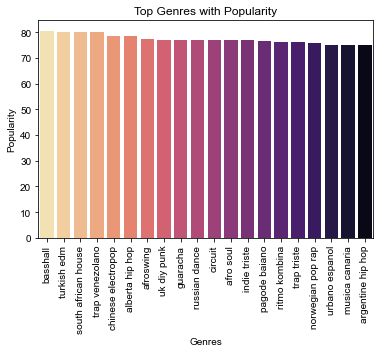

In [20]:
g_ap = df_genres.groupby("genres")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(g_ap.index, g_ap,palette='magma_r')
sns.set(rc={'figure.figsize':(12,7)})
axis.set_title('Top Genres with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Genres')
plt.xticks(rotation = 90)

## Preprocessing

Excluding the categorical attribute "genres".

I can't encode it because it has 2973 values, which is equal to the number of rows in the dataset.

In [32]:
X = df_genres.select_dtypes(np.number)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[1.        , 0.98326635, 0.12152658, ..., 0.10283222, 0.34504132,
        0.54545455],
       [1.        , 0.4967657 , 0.277988  , ..., 0.22361958, 0.65082645,
        0.45454545],
       [1.        , 0.7650596 , 0.75117532, ..., 0.99488045, 0.59504132,
        0.63636364],
       ...,
       [1.        , 0.26431638, 0.79347424, ..., 0.84038367, 0.5785124 ,
        0.45454545],
       [0.        , 0.99698794, 0.74391316, ..., 0.75323748, 0.        ,
        0.63636364],
       [1.        , 0.42272784, 0.65647143, ..., 0.82444398, 0.37514758,
        0.63636364]])

In [37]:
X.to_csv('genres_preprocessed.csv')

## 2D PCA

Reducing the dimensionality of the dataset in order to only capture the most important features.

<Figure size 864x504 with 0 Axes>

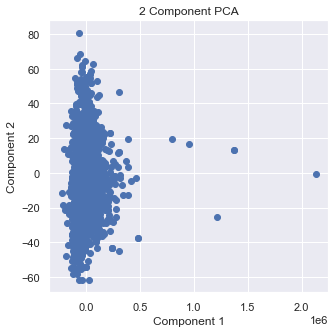

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

plt.figure()
plt.figure(figsize=(5,5))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

## 3D PCA

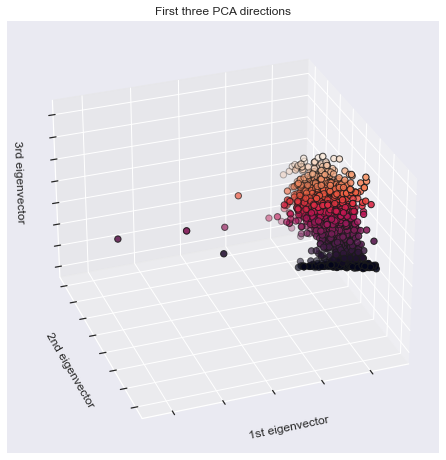

In [36]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

colors = ['navy', 'turquoise', 'darkorange']

y = df_genres['popularity']

pca = PCA(n_components=3) #We set the number of components to 3 so we can transform to a 3D space
X_reduced = pca.fit(X).transform(X) # Now we fit the PCA model to X with fit() and apply it to X immediately with transform() 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

## K-means clustering

Visualizing the Elbow method in order to choose an optimal K.

In [38]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_reduced)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

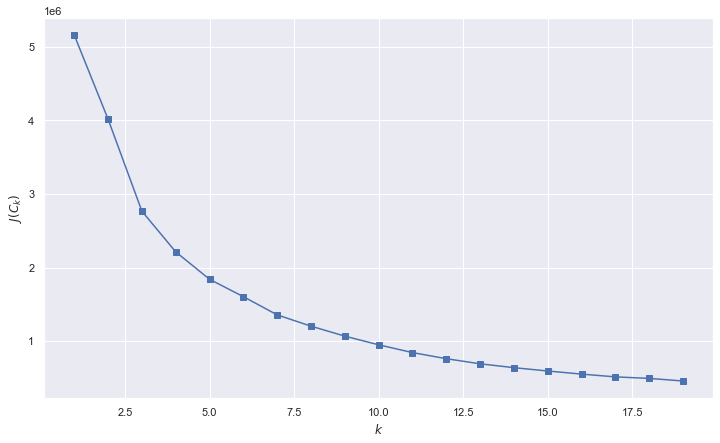

In [39]:
plt.plot(range(1, 20), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

Choosing K = 4.

In [44]:
#Initialize the class object
kmeans = KMeans(n_clusters=4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X_reduced)
 
#Getting unique labels
u_labels = np.unique(label)
 
labels = kmeans.labels_

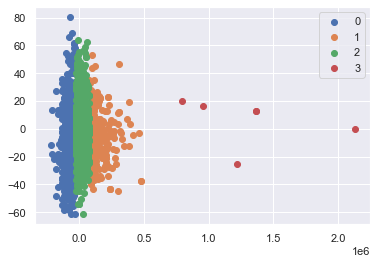

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in u_labels:
    plt.scatter(X_reduced[label == i , 0] , X_reduced[label == i , 1] , label = i)
plt.legend()
plt.show()

## Evaluation metrics

I will try clustering with 5 different algorithms: K-means, Affinity Propagation, Agglomerative Clustering, Spectral Clustering and DBSCAN.
I will evaluate the obtained clusters with respect to the attribute populatiry with different evaluation metrics.

In [46]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering,DBSCAN


X = df_genres.select_dtypes(np.number)
y = df_genres['popularity']

algorithms = []
algorithms.append(KMeans(n_clusters=5, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=5, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=5))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative','DBSCAN'])

results

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,-0.000521,-1.136652e-03,0.119155,0.751753,0.205705
Affinity,0.000000,-1.934134e-17,0.000000,1.000000,0.000000
Spectral,0.000326,5.248305e-03,0.145441,0.768238,0.244579
Agglomerative,-0.000582,-2.155451e-03,0.112839,0.746478,0.196043
DBSCAN,0.000000,-1.934134e-17,0.000000,1.000000,0.000000
